<a href="https://colab.research.google.com/github/Pramod-rr/Sleep-time-prediction/blob/main/Sleep_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets -q

In [ ]:
import pandas as pd
import opendatasets as od
import numpy as np
import seaborn as sns

In [ ]:
#download dataset
od.download('https://www.kaggle.com/datasets/govindaramsriram/sleep-time-prediction/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pramodrathnayake
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/govindaramsriram/sleep-time-prediction


100%|██████████| 28.1k/28.1k [00:00<00:00, 7.77MB/s]

In [ ]:
df = pd.read_csv('/content/sleep-time-prediction/sleeptime_prediction_dataset.csv') #open dataset

In [ ]:
df.head()

,WorkoutTime,ReadingTime,PhoneTime,WorkHours,CaffeineIntake,RelaxationTime,SleepTime
0,1.12,0.52,3.29,7.89,216.08,0.75,3.45
1,2.85,0.49,4.22,5.03,206.18,0.67,4.88
2,2.20,1.81,4.04,9.23,28.73,0.35,3.61
3,1.80,0.50,1.62,7.68,276.77,1.21,4.94
4,0.47,0.54,1.60,4.94,170.54,0.95,5.50


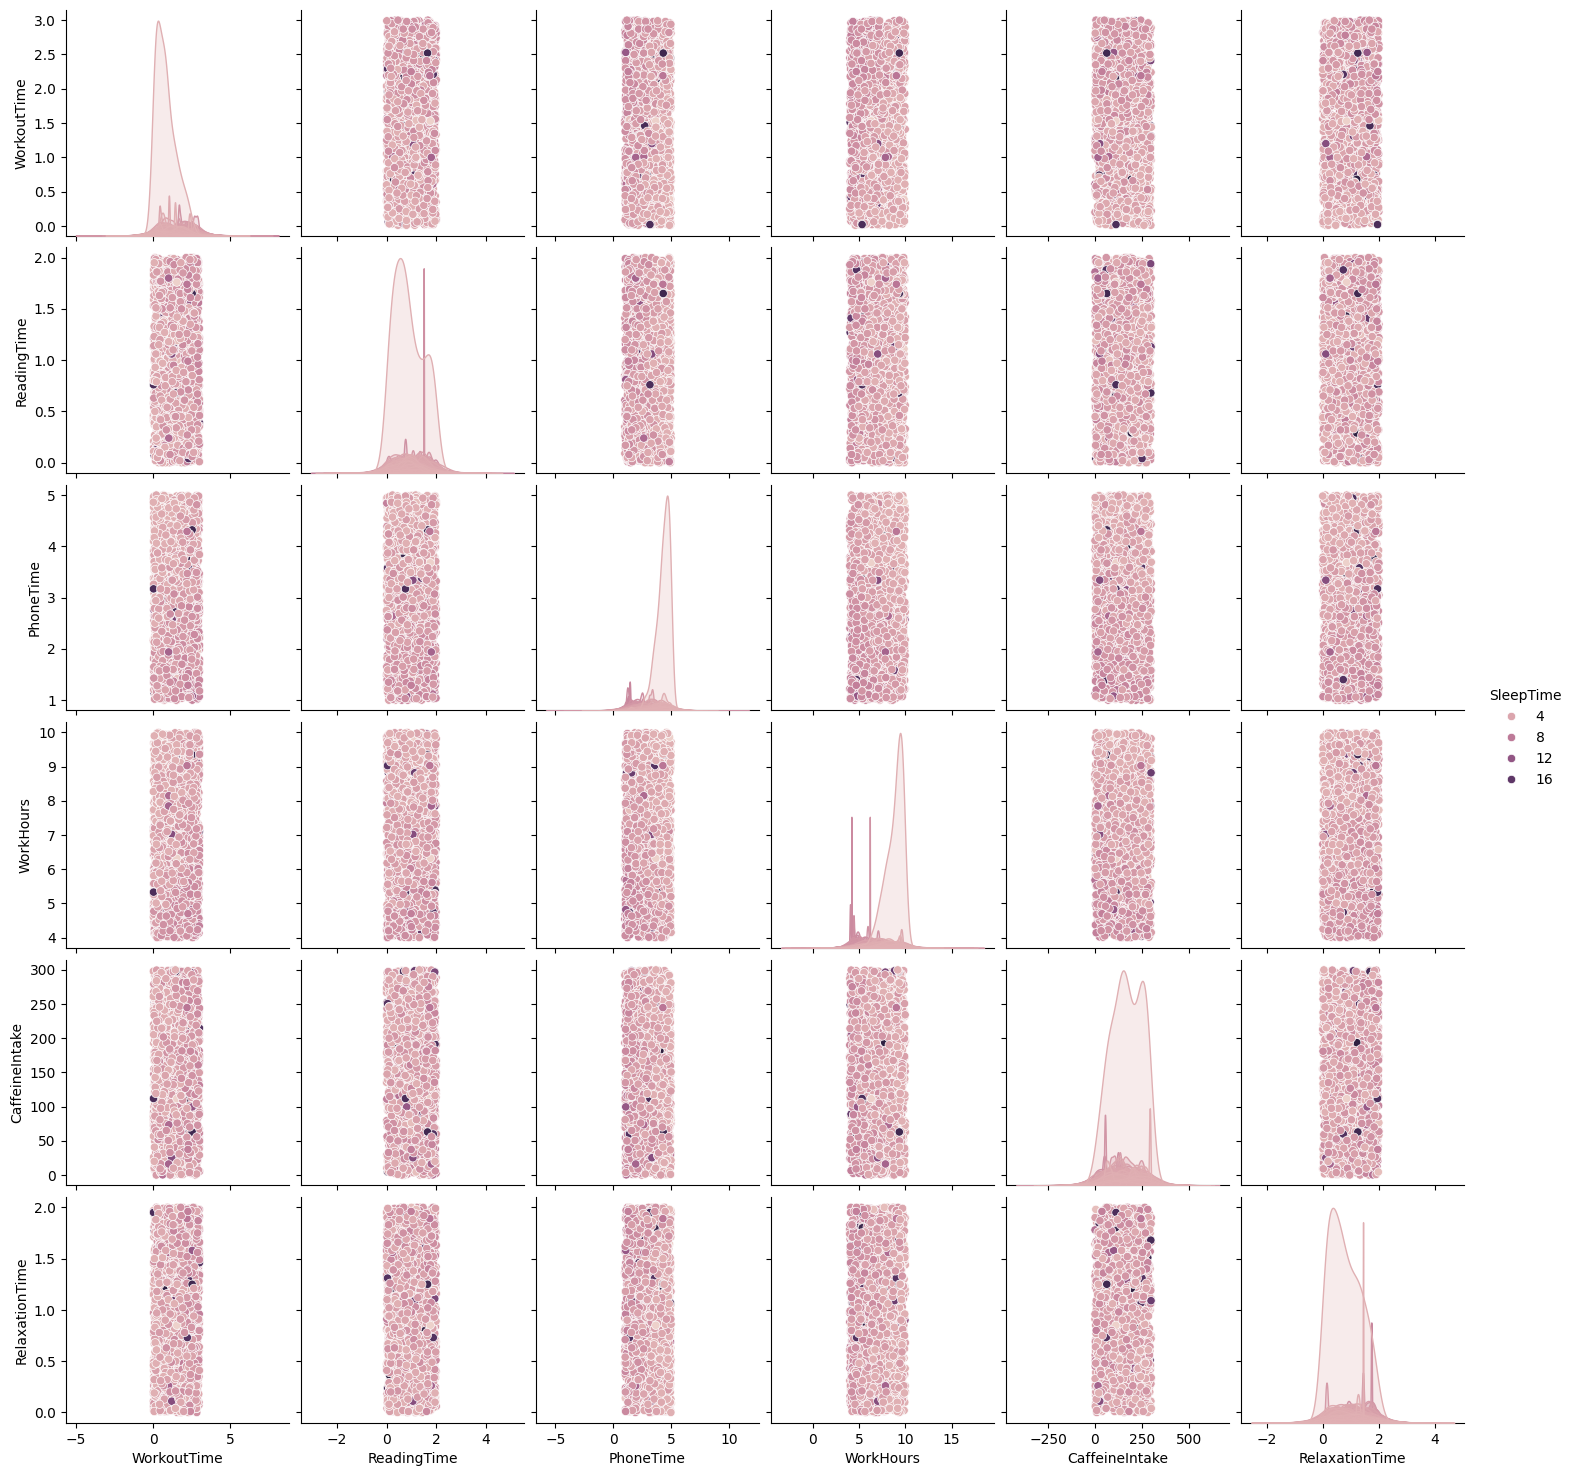

In [ ]:
# hue is the target variable
sns.pairplot(df, hue='SleepTime')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.svm import SVR

In [ ]:
X = df.drop('SleepTime', axis=1) # features
y = df['SleepTime'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) # training 80%, test 20%

In [ ]:
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance
X_train_scaled = scaler.fit_transform(X_train) # Fit to data, then transform it
X_test_scaled = scaler.transform(X_test) # Perform standardization by centering and scaling

# Train the SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

SVR()

In [ ]:
import joblib
joblib.dump(svm_model, 'sleep_time_prediction_model.pkl') #save the model
joblib.dump(scaler, 'scaler.pkl') # save the scaler

['scaler.pkl']

In [ ]:
y_pred = svm_model.predict(X_test_scaled) # Predict using the SVM model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae:.2f}") # 2 decimal places
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 0.47
Mean Squared Error: 4.40
Root Mean Squared Error: 2.10


In [ ]:
y_pred[:5] # first five predictions

array([3.97932903, 5.77376779, 5.70510943, 3.90070263, 4.82591718])

In [ ]:
y_test[:5] # first five actual values

,SleepTime
1458,3.98
198,5.70
1276,5.60
1243,3.94
1267,4.80
